## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

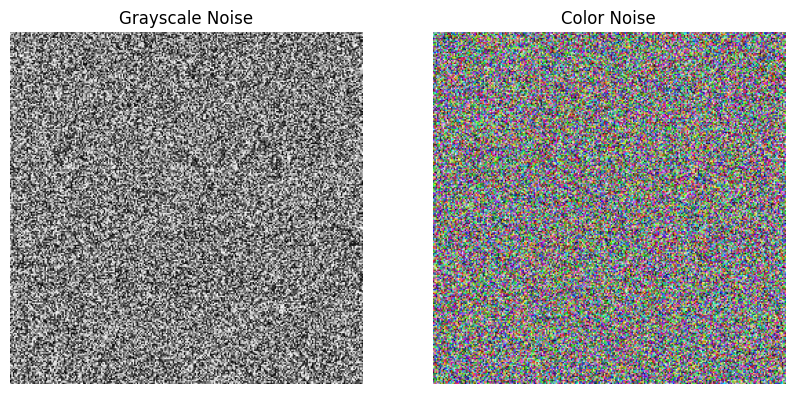

In [2]:
#Q1
import numpy as np
import matplotlib.pyplot as plt

def create_random_noise_images(width, height):
    # Create grayscale image
    grayscale_image = np.random.rand(height, width) 
    
    # Create color image 
    color_image = np.random.rand(height, width, 3)
    
    return grayscale_image, color_image

width, height = 256, 256  
grayscale_image, color_image = create_random_noise_images(width, height)

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Grayscale Noise")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Color Noise")
plt.imshow(color_image)
plt.axis('off')

plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


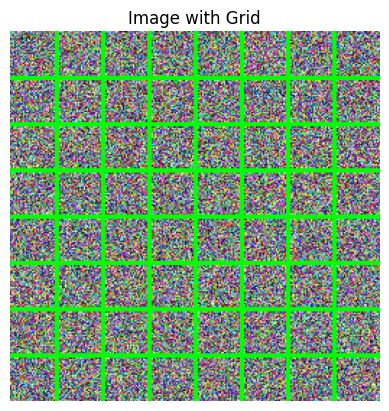

In [6]:
#Q2
import cv2 as cv
import numpy as np

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    # Copy the image to draw on
    img_with_grid = img.copy()
    
    # Image dimensions
    height, width = img.shape[:2]
    
    # Compute patch size
    patch_width = width // num_horizontal_grid
    patch_height = height // num_vertical_grid
    
    # Draw horizontal grid lines
    for i in range(1, num_vertical_grid):
        cv2.line(img_with_grid, (0, i * patch_height), (width, i * patch_height), line_color, thickness=2)
    
    # Draw vertical grid lines
    for i in range(1, num_horizontal_grid):
        cv2.line(img_with_grid, (i * patch_width, 0), (i * patch_width, height), line_color, thickness=2)
    
    return img_with_grid

# Example
img = color_image 
num_horizontal_grid = 8
num_vertical_grid = 8
line_color = (0, 255, 0) 

img_with_grid = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

plt.imshow(img_with_grid)
plt.title("Image with Grid")
plt.axis('off')
plt.show()


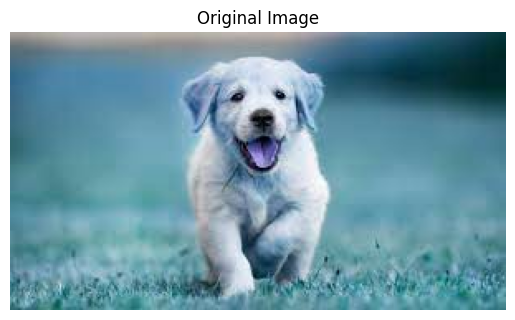

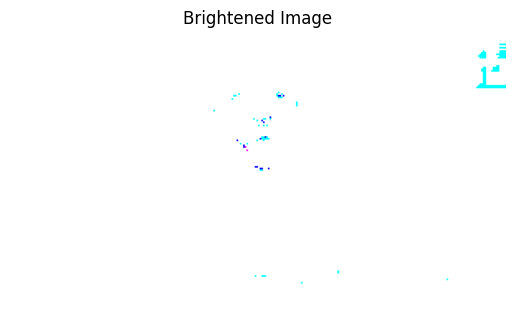

In [8]:
#Q3 Method1:Adjusting Pixel Values 
def adjust_brightness(img, factor):
    img_bright = np.clip(img * factor, 0, 1)  
    return img_bright

# Example
brightness_factor = 1.5
img = cv.imread('images/dog.jfif')
bright_img = adjust_brightness(img, brightness_factor)

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(bright_img)
plt.title("Brightened Image")
plt.axis('off')
plt.show()

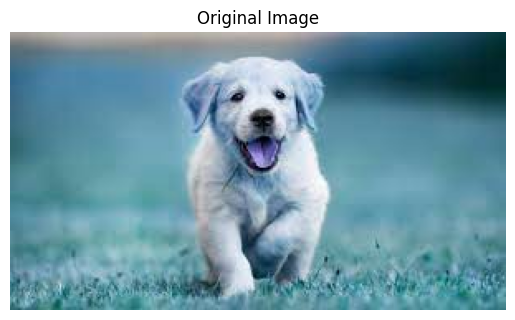

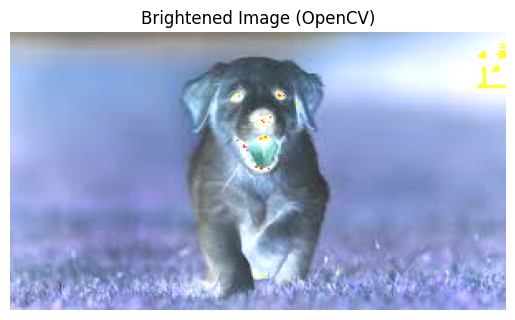

In [11]:
#Q3 Method2: Using OpenCV’s cv2.convertScaleAbs
def adjust_brightness_opencv(img, alpha, beta):
    # alpha is the contrast factor, beta is the brightness factor
    return cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# Example usage
brightness_alpha = 1.0  
brightness_beta = 50  
img = cv.imread('images/dog.jfif')
bright_img_opencv = adjust_brightness_opencv((img * 255).astype(np.uint8), brightness_alpha, brightness_beta)

plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.imshow(cv.cvtColor(bright_img_opencv, cv.COLOR_BGR2RGB))
plt.title("Brightened Image (OpenCV)")
plt.axis('off')
plt.show()

#### Q4
RGB: Widely used in digital images and displays. It represents color by mixing Red, Green, and Blue components. Ideal for display devices and digital cameras.

HSV: Stands for Hue, Saturation, and Value. Useful in image processing tasks where want to adjust colors without altering the brightness. For example, can change the hue to shift the colors while keeping the intensity the same.

CIELAB: Designed to be perceptually uniform, meaning that the perceived difference between colors is consistent. Useful for tasks like color correction and color matching, as it better represents human vision.